## Estimating the area of the Mandelbrot set using Monte Carlo integration

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import mandelbrot

### Fractal

In [2]:
# Sampling area defined by its edges
area = [-2, 0.75, -1, 1]
mandel_set = mandelbrot.mandel(area)

In [3]:
spacing = 0.005
max_iter = 100

xx, yy = mandel_set.grid(spacing)
plane = mandel_set.generate_fractal(max_iter, spacing)

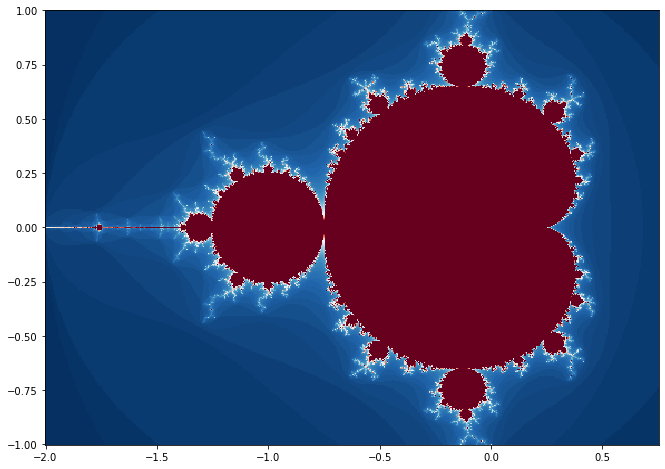

In [5]:
fig = plt.figure(figsize = (11, 8))
ax = plt.gca()
pc = ax.pcolormesh(xx, yy, plane, cmap=plt.cm.get_cmap('RdBu'))
plt.savefig('fractal.pdf')
plt.show()

### Varying the number of iterations

In [2]:
# Sampling area defined by its edges
area = [-2, 1, -1, 1]
mandel_set = mandelbrot.mandel(area)

#### Uniform sampling

In [31]:
runs = 100
n_samples = 1024
iterations = np.logspace(1, 10, 10, base = 2)

In [32]:
# List to store the average Mandelbrot set area and the sample variance
avg_area_uniform = []
sample_var_uniform = []

for i in iterations:
    calculation = mandel_set.avg_est_area(runs, n_samples, int(i), 'uniform')
    avg_area_uniform.append(calculation[0])
    sample_var_uniform.append(calculation[1])

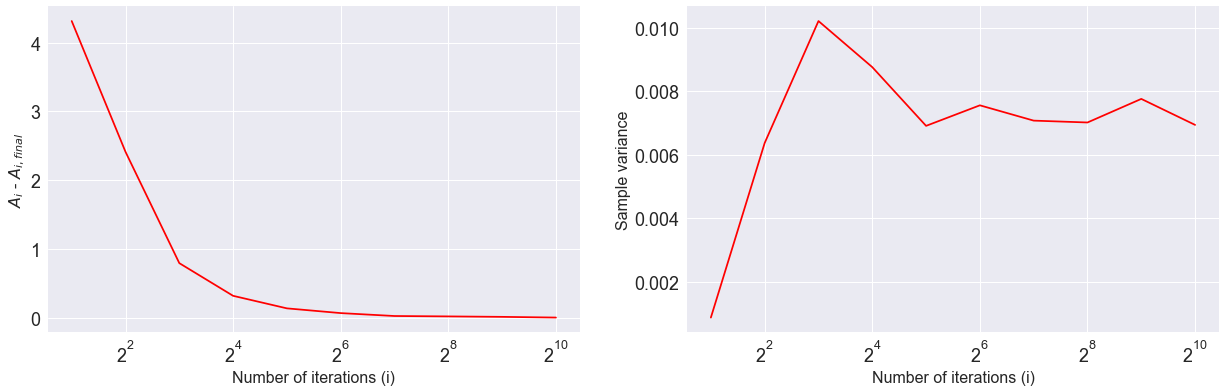

In [45]:
#Estimated area as a function of the number of iterations for uniform sampling

plt.style.use('seaborn')

fig, axs = plt.subplots(1, 2, figsize = (21, 6), sharex = True)

axs[0].tick_params(axis = 'both', labelsize = 18)
axs[1].tick_params(axis = 'both', labelsize = 18)

axs[0].semilogx(iterations, np.array(avg_area_uniform) - avg_area_uniform[-1], base = 2, color = 'red')
axs[0].set_xlabel('Number of iterations (i)', fontsize = 16)
axs[0].set_ylabel('$A_i$ - $A_{i,final}$', fontsize = 16)

axs[1].semilogx(iterations, sample_var_uniform, base = 2, color = 'red')
axs[1].set_xlabel('Number of iterations (i)', fontsize = 16)
axs[1].set_ylabel('Sample variance', fontsize = 16)

plt.show()

#### Latin hypercube sampling

In [34]:
# List to store the average Mandelbrot set area and the sample variance
avg_area_lhs = []
sample_var_lhs = []

for i in iterations:
    calculation = mandel_set.avg_est_area(runs, n_samples, int(i), 'latin_hypercube')
    avg_area_lhs.append(calculation[0])
    sample_var_lhs.append(calculation[1])

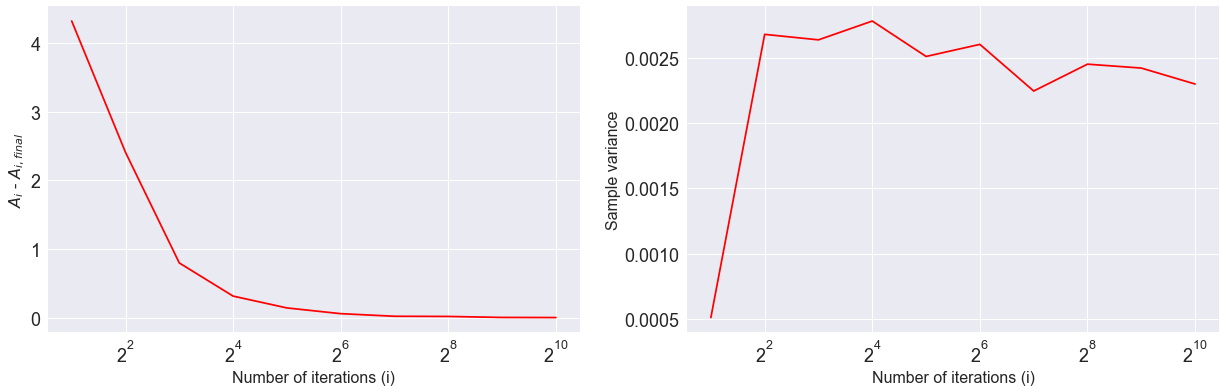

In [44]:
#Estimated area as a function of the number of iterations for Latin hypercube sampling

plt.style.use('seaborn')

fig, axs = plt.subplots(1, 2, figsize = (21, 6), sharex = True)

axs[0].tick_params(axis = 'both', labelsize = 18)
axs[1].tick_params(axis = 'both', labelsize = 18)

axs[0].semilogx(iterations, np.array(avg_area_lhs) - avg_area_lhs[-1], base = 2, color = 'red')
axs[0].set_xlabel('Number of iterations (i)', fontsize = 16)
axs[0].set_ylabel('$A_i$ - $A_{i,final}$', fontsize = 16)

axs[1].semilogx(iterations, sample_var_lhs, base = 2, color = 'red')
axs[1].set_xlabel('Number of iterations (i)', fontsize = 16)
axs[1].set_ylabel('Sample variance', fontsize = 16)

plt.show()

#### Orthogonal sampling

In [37]:
# List to store the average Mandelbrot set area and the sample variance
avg_area_ortho = []
sample_var_ortho = []

for i in iterations:
    calculation = mandel_set.avg_est_area(runs, n_samples, int(i), 'orthogonal')
    avg_area_ortho.append(calculation[0])
    sample_var_ortho.append(calculation[1])

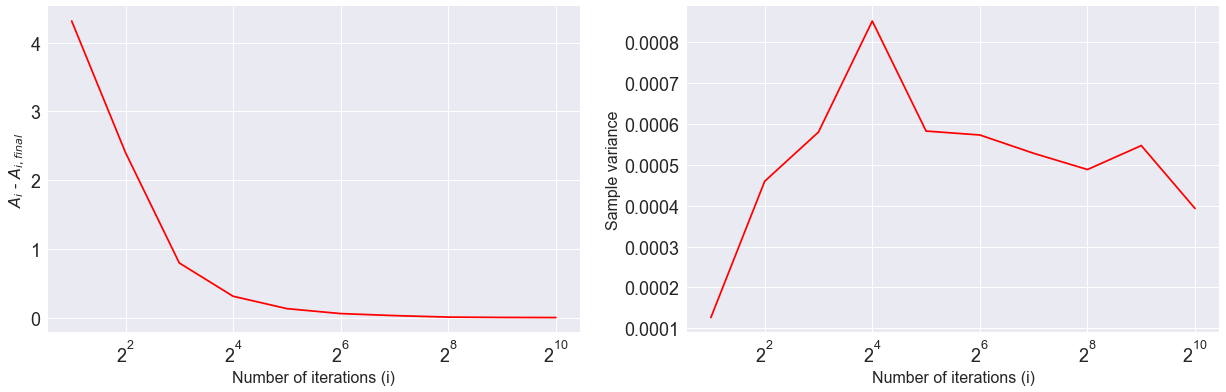

In [43]:
#Estimated area as a function of the number of iterations for orthogonal sampling

plt.style.use('seaborn')

fig, axs = plt.subplots(1, 2, figsize = (21, 6), sharex = True)

axs[0].tick_params(axis = 'both', labelsize = 18)
axs[1].tick_params(axis = 'both', labelsize = 18)

axs[0].semilogx(iterations, np.array(avg_area_ortho) - avg_area_ortho[-1], base = 2, color = 'red')
axs[0].set_xlabel('Number of iterations (i)', fontsize = 16)
axs[0].set_ylabel('$A_i$ - $A_{i,final}$', fontsize = 16)

axs[1].semilogx(iterations, sample_var_ortho, base = 2, color = 'red')
axs[1].set_xlabel('Number of iterations (i)', fontsize = 16)
axs[1].set_ylabel('Sample variance', fontsize = 16)

plt.show()

### Varying the number of samplepoints

In [59]:
runs = 100
max_iter = 100
n_samples = np.logspace(2, 12, 11, base = 2)

#### Uniform sampling

In [60]:
# List to store the average Mandelbrot set area and the sample variance
avg_area_uniform1 = []
sample_var_uniform1 = []

for s in n_samples:
    calculation = mandel_set.avg_est_area(runs, int(s), max_iter, 'uniform')
    avg_area_uniform1.append(calculation[0])
    sample_var_uniform1.append(calculation[1])

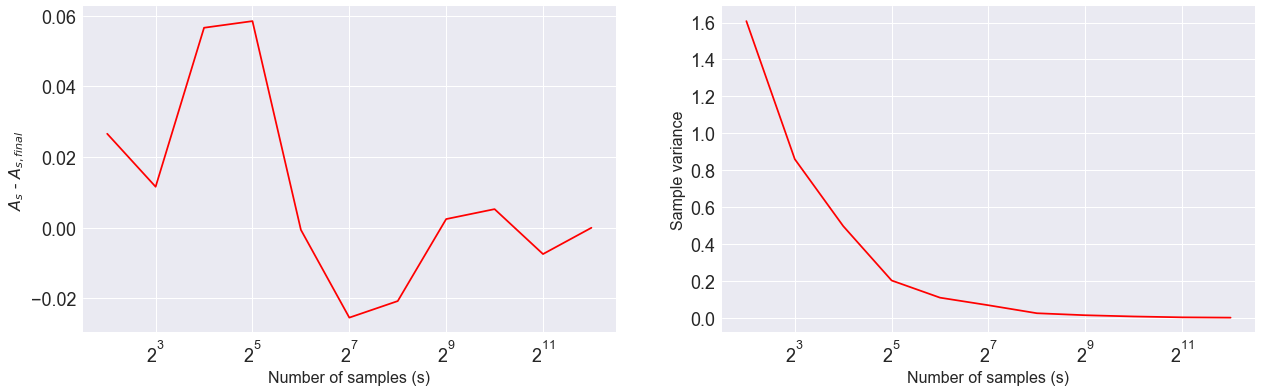

In [61]:
#Estimated area as a function of the number of samples for uniform sampling

plt.style.use('seaborn')

fig, axs = plt.subplots(1, 2, figsize = (21, 6), sharex = True)

axs[0].tick_params(axis = 'both', labelsize = 18)
axs[1].tick_params(axis = 'both', labelsize = 18)

axs[0].semilogx(n_samples, np.array(avg_area_uniform1) - avg_area_uniform1[-1], base = 2, color = 'red')
axs[0].set_xlabel('Number of samples (s)', fontsize = 16)
axs[0].set_ylabel('$A_s$ - $A_{s,final}$', fontsize = 16)

axs[1].semilogx(n_samples, sample_var_uniform1, base = 2, color = 'red')
axs[1].set_xlabel('Number of samples (s)', fontsize = 16)
axs[1].set_ylabel('Sample variance', fontsize = 16)

plt.show()

#### Latin hypercube sampling

In [62]:
# List to store the average Mandelbrot set area and the sample variance
avg_area_lhs1 = []
sample_var_lhs1 = []

for s in n_samples:
    calculation = mandel_set.avg_est_area(runs, int(s), max_iter, 'latin_hypercube')
    avg_area_lhs1.append(calculation[0])
    sample_var_lhs1.append(calculation[1])

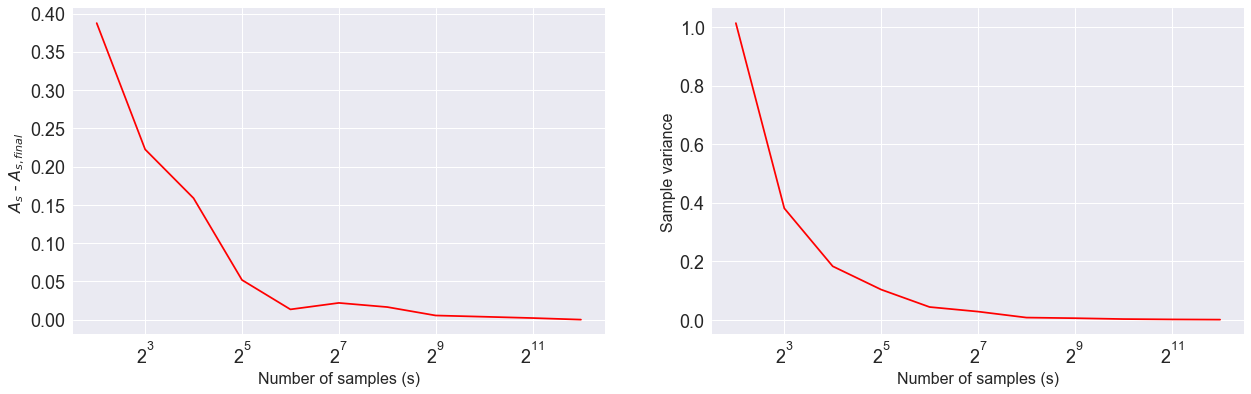

In [63]:
#Estimated area as a function of the number of samples for Latin hypercube sampling

plt.style.use('seaborn')

fig, axs = plt.subplots(1, 2, figsize = (21, 6), sharex = True)

axs[0].tick_params(axis = 'both', labelsize = 18)
axs[1].tick_params(axis = 'both', labelsize = 18)

axs[0].semilogx(n_samples, np.array(avg_area_lhs1) - avg_area_lhs1[-1], base = 2, color = 'red')
axs[0].set_xlabel('Number of samples (s)', fontsize = 16)
axs[0].set_ylabel('$A_s$ - $A_{s,final}$', fontsize = 16)

axs[1].semilogx(n_samples, sample_var_lhs1, base = 2, color = 'red')
axs[1].set_xlabel('Number of samples (s)', fontsize = 16)
axs[1].set_ylabel('Sample variance', fontsize = 16)

plt.show()

#### Orthogonal sampling

In [76]:
# Only samplesizes with integer square root
n_samples = np.logspace(1, 6, 6, base = 4)

# List to store the average Mandelbrot set area and the sample variance
avg_area_ortho1 = []
sample_var_ortho1 = []

for s in n_samples:
    calculation = mandel_set.avg_est_area(runs, int(s), max_iter, 'orthogonal')
    avg_area_ortho1.append(calculation[0])
    sample_var_ortho1.append(calculation[1])

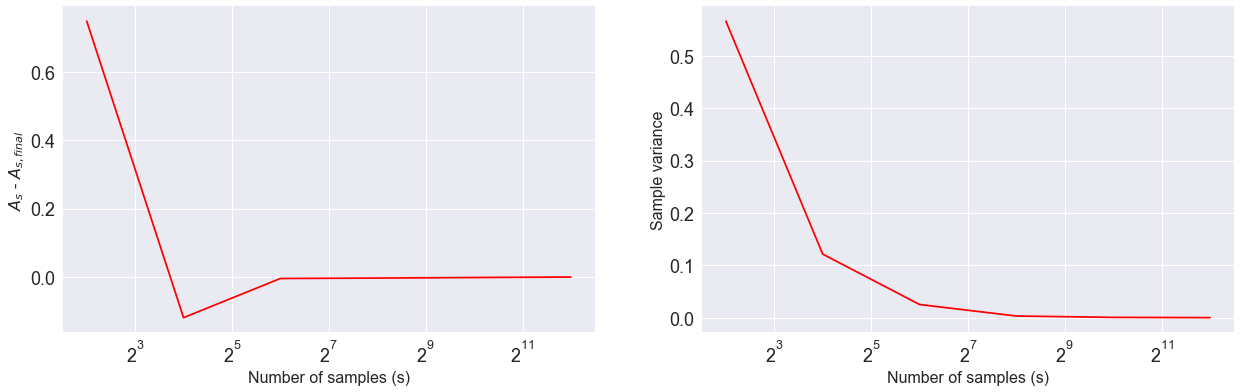

In [77]:
#Estimated area as a function of the number of samples for orthogonal sampling

plt.style.use('seaborn')

fig, axs = plt.subplots(1, 2, figsize = (21, 6), sharex = True)

axs[0].tick_params(axis = 'both', labelsize = 18)
axs[1].tick_params(axis = 'both', labelsize = 18)

axs[0].semilogx(n_samples, np.array(avg_area_ortho1) - avg_area_ortho1[-1], base = 2, color = 'red')
axs[0].set_xlabel('Number of samples (s)', fontsize = 16)
axs[0].set_ylabel('$A_s$ - $A_{s,final}$', fontsize = 16)

axs[1].semilogx(n_samples, sample_var_ortho1, base = 2, color = 'red')
axs[1].set_xlabel('Number of samples (s)', fontsize = 16)
axs[1].set_ylabel('Sample variance', fontsize = 16)

plt.show()